Ket Qua: 
0.4872849963998045
0.0013995800619440123
[86.27140264333552, 54.81435831869096, 46.273050152017014, 43.95388938522459, 43.32418412182852, 43.15320475400452, 43.106779961798054, 43.09417459698823, 43.09075197783645, 43.089822686356314, 43.08957038947854, 43.08950191265187, 43.08948334691482, 43.08947833331981, 43.08947699936977, 43.089476664564934, 43.089476601031265, 43.089476611164, 43.08947664129343, 43.089476676855, 43.089476713889944, 43.0894767513256, 43.08947678886944, 43.089476826442805, 43.08947686402391, 43.08947690160707, 43.089476939190554, 43.08947697677409, 43.08947701435744, 43.08947705194059, 43.08947708952358, 43.08947712710639, 43.08947716468906, 43.08947720227144, 43.08947723985368, 43.08947727743572, 43.08947731501763, 43.08947735259929, 43.08947739018076, 43.089477427762084, 43.08947746534318, 43.08947750292408, 43.08947754050485, 43.0894775780854, 43.08947761566576, 43.08947765324593, 43.08947769082592, 43.08947772840574, 43.08947776598535, 43.08947780356

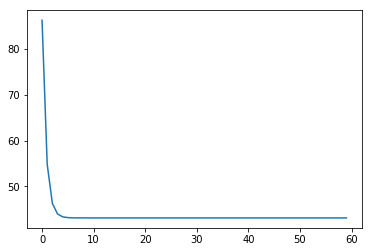

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
url = "https://github.com/TrinhDuy94/AI/blob/master/Advertising.csv?raw=true"
dataframe = pd.read_csv(url)
#print(dataframe)
X = dataframe.values[: ,2]
Y = dataframe.values[: ,4]
#plt.scatter(X, Y, marker='o')
#plt.show()

def predict(new_radio, weight, bias):
    return weight*new_radio + bias

def cost_function(X, Y, weight, bias):
    n = len(X)
    sum_error = 0
    for i in range(n):
        sum_error += (Y[i] - (weight*X[i] + bias))**2
        
    return sum_error/n

def update_weight(X, Y, weight, bias, learning_rate):
    n = len(X)
    weight_temp = 0.0
    bias_temp =0.0
    for i in range(n):
        weight_temp += -2*X[i]*(Y[i] - (X[i]*weight +bias))
        bias_temp += -2*(Y[i] - (X[i]*weight +bias))
    weight -= (weight_temp/n)*learning_rate
    bias -= (bias/n)*learning_rate
    
    return weight, bias

def train(X, Y, weight, bias, learning_rate, iter):
    cost_his = []
    for i in range(iter):
        weight, bias = update_weight(X, Y, weight, bias, learning_rate)
        cost = cost_function(X, Y, weight, bias)
        cost_his.append(cost)
    
    return weight, bias, cost_his

weight, bias, cost = train(X, Y, 0.03, 0.0014, 0.001, 60)
print("Ket Qua: ")
print(weight)
print(bias)
print(cost)
print("Gia Tri Du Doan: ")
print(predict(19, weight, bias))

solanlap = [i for i in range(60)]
plt.plot(solanlap,cost)
plt.show()